<a href="https://colab.research.google.com/github/razamehar/IMDB-Sentiment-Analysis-BoW-S2S-Models/blob/main/Sentiment_Analysis_V2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Download and Extraction

---
In this section, we focus on the steps required to download and extract the IMDB dataset. First, the dataset is retrieved from a specified URL, ensuring we have the necessary data for our analysis. After downloading, the contents of the dataset are extracted from the compressed tar.gz file. These steps are essential to prepare the data for subsequent processing and analysis, enabling us to work with the IMDB dataset effectively.


In [ ]:
# Download the IMDB dataset from the specified URL
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

# Extract the contents of the downloaded tar.gz file
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  61.7M      0  0:00:01  0:00:01 --:--:-- 61.7M


# Utilities

---
This section contains utility functions designed to assist with various tasks related to dataset management and analysis.

First, the get_info function is defined to display the count of files, the name of the first file, and the content of a random file in a specified directory. It accepts a sub-directory (e.g., 'train' or 'test') and a category (e.g., 'neg' or 'pos') as arguments and returns a list of file names along with the number of files.

Next, the move_files function is implemented to move a specified number of files from the training set to a validation set. It takes a list of file names, the number of validation samples, and the category as inputs, shuffling the file list and transferring the designated files.

The get_info_from_ds function is then defined to provide information about a batched dataset created using Keras's text_dataset_from_directory function. It prints the shape and data type of the inputs and targets, as well as the first input and target sample.

Lastly, the analyze_text_samples function calculates the ratio of the number of training samples to the mean number of words per sample and returns a list of all the words in the text samples. It iterates through the text files in a specified directory, counting the total words and computing the mean words per sample. This ratio helps determine whether a bag-of-words or sequence model might perform better on the data.

These utility functions provide essential tools for managing and analyzing text datasets, aiding in the preparation and evaluation processes.

In [ ]:
# Define a function that displays the count of files, the name of the first file, and the content of a random file in the specified directory.

import pathlib
import os
import random

# Set the path of the base directory.
base_dir = pathlib.Path('/content/aclImdb')

def get_info(sub_dir, category):
  '''
    Args:
        sub_dir (str): A sub-directory within the base directory (e.g., 'train' or 'test').
        category (str): A class sub-directory within the sub-directory that defines the class (e.g., 'neg' or 'pos').

    Return:
        file_names (list): List of names of all files and folders in the specified directory.
        num_files (int): Count of samples in the specified directory.
  '''

  # Join the paths.
  path = base_dir / sub_dir / category

  # Retrieve the list of names of all files and folders, if any, in the specified path.
  file_names = os.listdir(path)

  # Count of files
  num_files = len(file_names)

  # Display the count of samples and the name of first file.
  print(f'Directory: {sub_dir} - Class: {category}')
  print(f'\tNumber of samples: {num_files}')
  print(f'\tName of the first file: {file_names[0]}')

  # Read a random sample and display its content.
  idx = random.randint(0, num_files)

  with open(path/file_names[idx], 'r') as file:
    content = file.read()

  print(f'\tContent of a random sample: {content}\n')

  return file_names, num_files

In [ ]:
# Define a function that moves files from training to val.

import shutil

def move_files(file_names, num_val_samples, category):
  '''
    Args:
      file_names (list): List of names all files and folders in the specified directory.
      num_files (int): Count of samples in the specified directory.
      category (str): A class sub-directory within the sub-directory that defines the class (e.g., 'neg' or 'pos').
  '''
  # Shuffle the files using the seed.
  random.Random(1000).shuffle(file_names)

  val_files = file_names[-num_val_samples:]

  for fname in val_files:
    shutil.move(train_dir / category / fname,
                val_dir / category / fname)

In [ ]:
# Define a function that inputs information about the batched dataset.

def get_info_from_ds(ds, ds_type):
  '''
    Args:
      ds (tf_BatchDataset): A batched dataset created using Keras's text_dataset_from_directory function.
      df_type (str): Name of the batched dataset.
  '''
  print(ds_type)

  for inputs, targets in ds:
    print("\tinputs.shape:", inputs.shape)
    print("\tinputs.dtype:", inputs.dtype)
    print("\ttargets.shape:", targets.shape)
    print("\ttargets.dtype:", targets.dtype)
    print("\tinputs[0]:", inputs[0])
    print("\ttargets[0]:", targets[0])
    break

In [ ]:
# Define a function that calculates the ratio of number per training samples / mean words per samples and also returns the list of all the words in the text samples.
import glob

def analyze_text_samples(path):
  '''
    Args:
      path (str): path to a directory containing samples.

    Returns:
      words (list): List of all the words in the sample.
  '''

  words_in_samples = 0
  words = []

  # Define the path to the directory containing the text files
  path = path

  # Get a list of all text files in the directory
  txt_files = glob.glob(os.path.join(path, '*.txt'))

  # Iterate through the list of files and print the content of each file
  for file in txt_files:
      with open(file, 'r', encoding='utf-8') as f:
          content = f.read()
          words.append(content.split())
          words_in_samples += len(content.split()) # .split() is used as we want the count of words and not characters.

  print('Total words in all the sampples:', words_in_samples)

  mean_words_per_sample = words_in_samples/num_train_samples
  mean_words_per_sample

  print('Mean words per sample:', mean_words_per_sample)

  ratio = num_train_samples/mean_words_per_sample
  print('Ratio of number per training samples / mean words per samples:', ratio)
  print('\n')

  if ratio < 1500:
    print('Bag-of-words model might perform better on this data.')
  else:
    print('Sequence model might perform better on this data')

  return words

# Data Review

---
In this section, we utilize the get_info function to review the IMDB dataset. This function helps display the count of samples, the name of the first file, and the content of a random sample within specified directories. The results from this function provide a comprehensive overview of the dataset structure and contents, aiding in understanding the data distribution.

We start by applying the get_info function to the training data for both positive and negative classes. The function returns a list of file names and the number of files in each category, which will be useful for further processing:

For the 'train' sub-directory, we gather information on both 'pos' (positive) and 'neg' (negative) categories.
Next, we apply the get_info function to the test data. Although the count of files in the 'test' sub-directory is not required for subsequent steps, invoking this function provides insight into the test data's structure:

We examine the 'pos' (positive) and 'neg' (negative) categories within the 'test' sub-directory.
This review step ensures that we have a clear understanding of the dataset's composition, which is crucial for any further analysis or model training.

In [ ]:
# Use get_info() function to display the count of samples, the name of the first file, and the content of a random samples.
# The function returns a list of file names as well as a count of files that will be utilized later.

file_names_train_pos, num_files_train_pos = get_info('train', 'pos')
file_names_train_neg, num_files_train_ne = get_info('train', 'neg')

# Use _ as we will not require count of files in the class sub-directories of the test sub-directory.
_, _ = get_info('test', 'pos')
_, _ = get_info('test', 'neg')

Directory: train - Class: pos
	Number of samples: 12500
	Name of the first file: 11657_9.txt
	Content of a random sample: It's really rare that you get an inside view at a media deception that has been so widely reported as official "truth" and caught so many "news" agencies with their pants down. This movie, in my view, deserves every price there is in journalism - it's objective (yes!), courageous and a real "scoop". It can do without comment, fake scenes or leading questions - everyone, including Chavez equally gets to make fools of themselves in their own words. The filmmakers "only" had to keep track of events and keep their cameras rolling.<br /><br />The Venezuelan elite teaches us "How to depose of a President and sell it as a victory of democracy". It's amazing that they lost in the end - so far. From what I know, the biggest TV station involved only got its terrestrial license revoked, they're still broadcasting via cable and satellite. I highly doubt whether George W. or Bar

**Observation:** The training datasets have equal positive and negative samples, indicating class balance.

In [ ]:
# Delete the unnecessary unsup directory and all of its contents (subdirectories and files) within the aclImdb/train directory.
!rm -r aclImdb/train/unsup

In this section, we undertake the creation of a validation dataset, a crucial step for evaluating machine learning model performance on unseen data during training. We start by defining paths for the training and test directories within the base directory. Next, we establish the validation directory, complete with sub-directories for positive and negative classes, ensuring their presence even if already existing. We then determine the number of validation samples by aggregating the counts of positive and negative training samples and allocating ten percent of this total for validation. Using the move_files function, we transfer the calculated number of files from the training directory to the validation directory, organizing positive and negative samples accordingly. Finally, we employ the get_info function to display updated file counts, the name of the first file, and the content of a random file in both the training and validation directories post-transfer, ensuring the creation of a validation dataset essential for assessing model generalization.

In [ ]:
# Set the paths of the train and test directories respectively.
train_dir = base_dir / 'train'
test_dir = base_dir / 'test'

# Create the val directory.
os.makedirs(base_dir / 'val' / 'pos', exist_ok=True)
os.makedirs(base_dir / 'val' / 'neg', exist_ok=True)

# Set the path of the val directory.
val_dir = base_dir / 'val'

In [ ]:
num_files_train = num_files_train_pos + num_files_train_pos
num_val_samples = int(num_files_train * 0.1)
num_val_samples

2500

In [ ]:
move_files(file_names_train_pos, num_val_samples, 'pos')
move_files(file_names_train_neg, num_val_samples, 'neg')

In [ ]:
# Use get_info() function to display the count of files, the name of the first file, and the content of a random file for train and val after moving the files.
_, _ = get_info('train', 'pos')
_, _ = get_info('train', 'neg')
_, _ = get_info('val', 'pos')
_, _ = get_info('val', 'neg')

Directory: train - Class: pos
	Number of samples: 10000
	Name of the first file: 11657_9.txt
	Content of a random sample: I am amazed that movies like this can still be made. I watch all kinds of movies all the time with my friends and i can say that this is one of the best i ever seen. Never thinked that a movie of 146 minutes can make me think about it on and on.<br /><br />Washington, charismatic and intense as ever, plays Creasy, a washed-up ex-counter-terrorist agent who's taken to the bottle. Once he's assigned to protect young Pita (Dakota Fanning) in Mexico City, his emotional and redemptive arc is jump-started in the way only an adorable little girl can provide. Inevitably, Pita is kidnapped by thugs, and Creasy decides that most of Mexico City must pay the price for daring to take away his character's teddy-bear-clutching catalyst. Yes, he has become...a Man on Fire. <br /><br />You must see this movie.

Directory: train - Class: neg
	Number of samples: 10000
	Name of the fir

# Datasets Batch Creation

---
In this section, we create batched datasets for training, validation, and testing using TensorFlow's text_dataset_from_directory function. This process is essential for efficiently handling and feeding data into machine learning models.

First, we define the batch size for the datasets, setting it to 32. This means that each batch will contain 32 samples. Next, we load the training dataset from the specified directory. The text_dataset_from_directory function is used to load the dataset from the 'train' directory, with the specified batch size.

We then load the validation dataset. Similarly, the validation dataset is loaded from the 'val' directory, also using the specified batch size. Lastly, we load the test dataset. The test dataset is loaded from the 'test' directory, following the same procedure.

To ensure the datasets are correctly loaded and structured, we use the get_info_from_ds function to display information about the training and validation datasets. This function prints the shape and data type of the inputs and targets, as well as the first input and target sample for both the training and validation datasets.

By following these steps, we successfully create and batch the datasets, which are now ready for use in training, validating, and testing our machine learning models.


In [ ]:
import tensorflow
from tensorflow.keras.utils import text_dataset_from_directory

# Define the batch size for the dataset
batch_size = 32

# Load the training dataset from the specified directory
train_ds = text_dataset_from_directory(
    '/content/aclImdb/train',
    batch_size=batch_size
)

# Load the validation dataset from the specified directory
val_ds = text_dataset_from_directory(
    '/content/aclImdb/val',
    batch_size=batch_size
)

# Load the test dataset from the specified directory
test_ds = text_dataset_from_directory(
    '/content/aclImdb/test',
    batch_size=batch_size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [ ]:
get_info_from_ds(train_ds, 'Train')
get_info_from_ds(val_ds, 'Val')

Train
	inputs.shape: (32,)
	inputs.dtype: <dtype: 'string'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor(b'I thought the original of this film was quaint and charming as well as having me sitting on the edge of my seat trying to figure it out.<br /><br />Since I had already seen the original, when I saw this on Sci Fi Channel- I don\'t know if this remake was deliberately made for Sci Fi - I knew what it was within the first few minutes. Since I like Richard Burgi as a character actor, I wanted to see how he would pull it off.<br /><br />The writers/producers etc, modernized the film a bit by trying to explain the plight of the "aliens" (They could no longer reproduce their own kind and needed help) using the same pseudo science that has been crammed in our ears in the 90\'s. Maybe it added a bit of polish to the film, or not.<br /><br />This film. Film? This production takes on a more sinister edge than the original did- The original ended with a confro

# Consideration for Model Selection

**When to use a Sequence Model over Bag-of-Words Model**

---
Before proceeding with model selection, it's crucial to understand the characteristics of the dataset.

First, we determine the total number of training samples by counting the files in both the 'positive' and 'negative' classes. Next, we calculate the total number of words across all samples and computing the mean number of words per sample.

If the ratio between the number of samples in the training data and the average number of words per sample is less than 1500, then a bag-of-words model will perform better. Conversely, if the ratio is greater than 1500, a sequence model will perform better.

In a bag-of-words model, word order is discarded, while order is considered in a sequence model. A third alternatie, the Transformer architecture presents a hybrid approach.

*This heuristic rule is based on a systematic analysis of the performance of various text classification techniques across many different types of text datasets by Francois Chollet in 2017.*


In [ ]:
fname_pos = os.listdir('/content/aclImdb/train/pos')
fname_neg = os.listdir('/content/aclImdb/train/neg')

# Count of files
num_train_samples = len(fname_pos + fname_neg)
num_train_samples

20000

In [ ]:
words = analyze_text_samples('/content/aclImdb/train/pos')

Total words in all the sampples: 2369499
Mean words per sample: 118.47495
Ratio of number per training samples / mean words per samples: 168.81205689472753


Bag-of-words model might perform better on this data.


# Top 100 Words by Frequency

---

This section contains a visualization of the top 100 words by frequency. The words are categorized into four groups, each representing a range of word frequencies: the first group contains the top 30 words, the second group contains words ranked from 31 to 60, the third group contains words ranked from 61 to 90, and the fourth group consists of the remaining words, from 91 to 100. By examining these word frequencies, we gain insights into the distribution of language patterns within the dataset.

In [ ]:
import string

# Create a translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Initialize an empty dictionary to store word frequencies
words_dict = {}

# Iterate over each list of words in the 'words' variable
for list_words in words:
    # Iterate over each word in the current list of words
    for word in list_words:
        # Strip leading and trailing whitespace, convert to lowercase
        word = word.strip().lower()
        # Remove punctuation from the word using the translation table
        word = word.translate(translator)
        # If the word is already in the dictionary, increment its count
        if word in words_dict:
            words_dict[word] += 1
        # If the word is not in the dictionary, add it with a count of 1
        else:
            words_dict[word] = 1

# Sort the dictionary by word frequency in descending order
sorted_words_dict = dict(sorted(words_dict.items(), key=lambda x: x[1], reverse=True))

Text(0.5, 1.0, 'Top 31-60 Words')

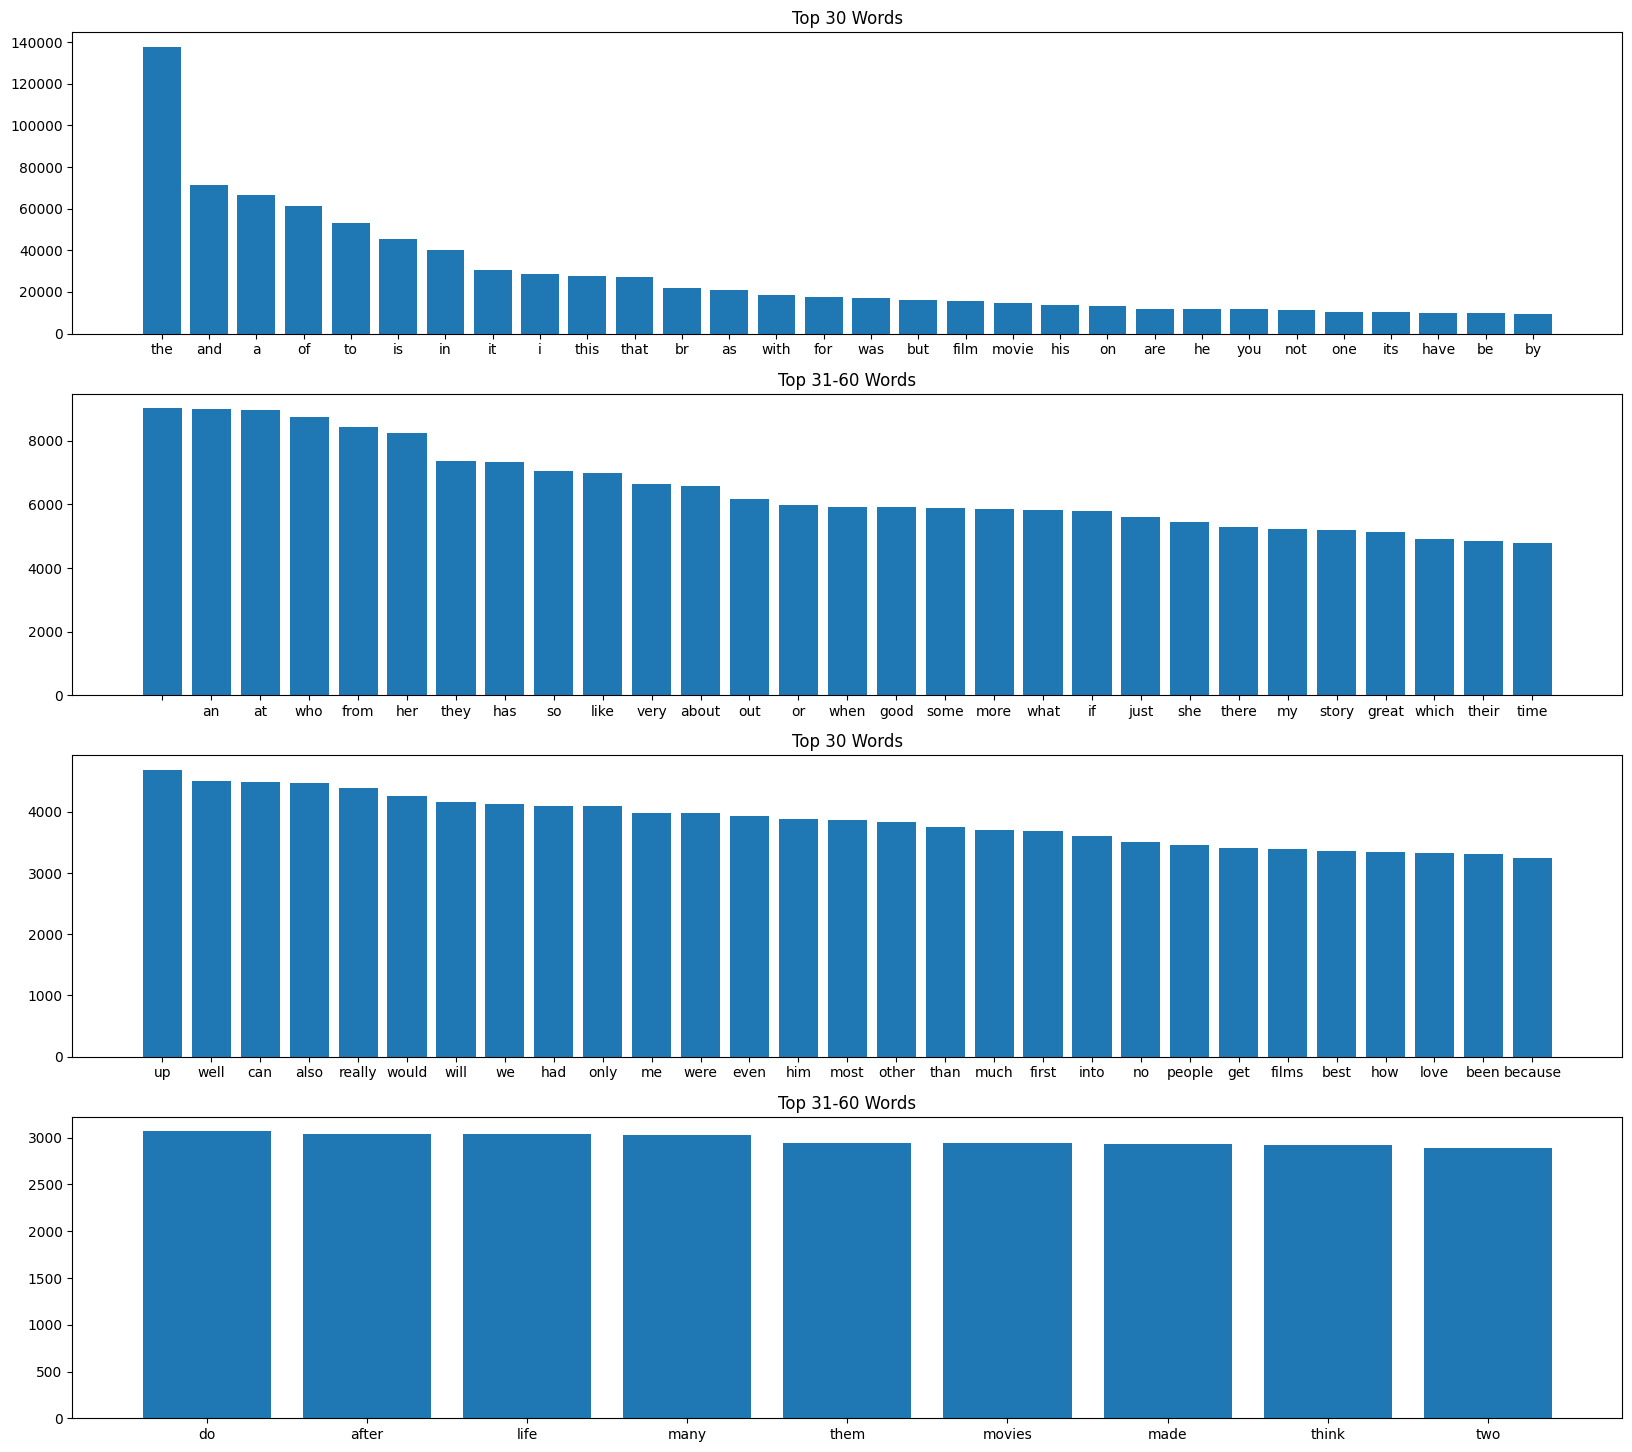

In [ ]:
import matplotlib.pyplot as plt

top_30 = list(sorted_words_dict.keys())[:30]
top_30_freq = list(sorted_words_dict.values())[:30]

top_31_60 = list(sorted_words_dict.keys())[31:60]
top_31_60_freq = list(sorted_words_dict.values())[31:60]

top_61_90 = list(sorted_words_dict.keys())[61:90]
top_61_90_freq = list(sorted_words_dict.values())[61:90]

top_91_100 = list(sorted_words_dict.keys())[91:100]
top_91_100_freq = list(sorted_words_dict.values())[91:100]

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 18))

ax[0].bar(top_30, top_30_freq)
ax[0].set_title('Top 30 Words')

ax[1].bar(top_31_60, top_31_60_freq)
ax[1].set_title('Top 31-60 Words')

ax[2].bar(top_61_90, top_61_90_freq)
ax[2].set_title('Top 30 Words')

ax[3].bar(top_91_100, top_91_100_freq)
ax[3].set_title('Top 31-60 Words')

# Bag-of Words Model Utility

---

In this section, a utility function is provided for building a Bag-of-Words model. This function constructs a neural network model using TensorFlow's Keras API.

The model architecture includes an input layer with a shape based on the maximum number of tokens (max_tokens), followed by a dense hidden layer with ReLU activation. A dropout layer is added to prevent overfitting, with a dropout rate of 50%. Finally, an output layer with a sigmoid activation function is included for binary classification.

The model is compiled using the Adam optimizer and binary crossentropy loss function, making it suitable for binary classification tasks.

This utility function offers flexibility by allowing customization of parameters such as the maximum number of tokens, the dimensionality of the hidden layer, and the dropout rate. By using this function, users can easily create and compile Bag-of-Words models tailored to their specific requirements.

In [ ]:
max_tokens=20000
max_length=600
epochs=15

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import load_model

# Function to build a neural network model
def build_model(max_tokens=max_tokens, hidden_dims=16):
    # Define the input layer with the shape based on max_tokens
    inputs = Input(shape=(max_tokens,), name='Input_layer')

    # Add a dense hidden layer with ReLU activation
    x = Dense(hidden_dims, activation='relu', name='Hidden_layer')(inputs)

    # Add a dropout layer to prevent overfitting
    x = Dropout(0.50)(x)

    # Add the output layer with sigmoid activation for binary classification
    outputs = Dense(1, activation='sigmoid', name='Output_layer')(x)

    # Create the model by specifying inputs and outputs
    model = Model(inputs, outputs, name='Bag_of_Words_Model')

    # Compile the model with Adam optimizer and binary crossentropy loss function
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Return the compiled model
    return model

# UniGram Model

---
In this section, a UniGram model is implemented for text classification using TensorFlow's Keras API.

The TextVectorization layer is utilized to preprocess and vectorize the text data. The ngrams parameter is set to 1, indicating unigrams (individual words), and the output_mode is set to 'multi_hot', which outputs a binary vector indicating the presence or absence of each token in the vocabulary.

The vocabulary of all unigram tokens in the dataset is built and indexed using the adapt method of the text_vectorization layer. Subsequently, the datasets are preprocessed and vectorized using this layer.

Training, validation, and testing datasets are prepared by mapping the text data to their corresponding vectorized representations.

A neural network model is built using the build_model function, with 20,000 max tokens and 64 hidden dimensions. The model is then compiled and trained using the binary crossentropy loss function and Adam optimizer. Model checkpoints are saved to ensure the best performing model is retained.

After training, the model is evaluated on the test dataset, and the test accuracy is printed.

This UniGram model serves as a baseline for text classification tasks, providing a foundation for more advanced models to be built upon.

In [ ]:
from tensorflow.keras.layers import TextVectorization

ngrams=1

text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    ngrams=ngrams,
    output_mode='multi_hot'
)

# Extract only inputs and not labels from the dataset.
text_only_ds = train_ds.map(lambda x, y: x)

# Build the vocabulary of all unigram tokens in the dataset and index it.
text_vectorization.adapt(text_only_ds)

# Preprocess and vectorize the datasets.
binary_1gram_train_ds = train_ds.map(lambda x, y: (text_vectorization(x), y))

binary_1gram_val_ds = test_ds.map(lambda x, y: (text_vectorization(x), y))

binary_1gram_test_ds = test_ds.map(lambda x, y: (text_vectorization(x), y))

In [ ]:
get_info_from_ds(binary_1gram_train_ds, 'Train')
get_info_from_ds(binary_1gram_val_ds, 'Val')
get_info_from_ds(binary_1gram_test_ds, 'Test')

Train
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(2, shape=(), dtype=int32)
Val
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(1, shape=(), dtype=int32)
Test
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
model1 = build_model(20000, 64)
model1.summary()

Model: "Bag_of_Words_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 20000)]           0         
                                                                 
 Hidden_layer (Dense)        (None, 64)                1280064   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint

callbacks = [
 ModelCheckpoint("binary_1gram.keras",
                 save_best_only=True)
]

epochs=15

In [ ]:
model1.fit(binary_1gram_train_ds.cache(),
validation_data=binary_1gram_val_ds.cache(),
 epochs=epochs,
 callbacks=callbacks)

Epoch 1/15
625/625 [==============================] - 24s 38ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.7804 - val_accuracy: 0.8661
Epoch 2/15
625/625 [==============================] - 15s 23ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.8070 - val_accuracy: 0.8664
Epoch 3/15
625/625 [==============================] - 16s 25ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.8015 - val_accuracy: 0.8658
Epoch 4/15
625/625 [==============================] - 15s 24ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.8540 - val_accuracy: 0.8646
Epoch 5/15
625/625 [==============================] - 15s 24ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.8639 - val_accuracy: 0.8631
Epoch 6/15
625/625 [==============================] - 16s 25ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.9080 - val_accuracy: 0.8629
Epoch 7/15
625/625 [==============================] - 13s 21ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.8752 - val_accuracy:

In [ ]:
model1 = load_model("binary_1gram.keras")
print(f"Test accuracy: {model1.evaluate(binary_1gram_test_ds)[1]:.3f}")

782/782 [==============================] - 6s 8ms/step - loss: 0.7804 - accuracy: 0.8661
Test accuracy: 0.866


The unigram model achieves an accuracy of 86.7% on the test data. Let's try a bigram model to assess its performance.

# BiGram Model

---

In this section, a BiGram model is implemented for text classification using TensorFlow's Keras API.

The TextVectorization layer is employed to preprocess and vectorize the text data. The ngrams parameter is set to 2, indicating bigrams (pairs of consecutive words), and the output_mode is set to 'multi_hot', which outputs a binary vector indicating the presence or absence of each token in the vocabulary.

The vocabulary of all bigram tokens in the dataset is built and indexed using the adapt method of the text_vectorization layer. Subsequently, the datasets are preprocessed and vectorized using this layer.

Training, validation, and testing datasets are prepared by mapping the text data to their corresponding vectorized representations.

A neural network model is built using the build_model function, with 20,000 max tokens and 16 hidden dimensions. The model is then compiled and trained using the binary crossentropy loss function and Adam optimizer. Model checkpoints are saved to ensure the best performing model is retained.

After training, the model is evaluated on the test dataset, and the test accuracy is printed.

This BiGram model extends the UniGram model by considering pairs of consecutive words, potentially capturing more complex patterns in the text data.

In [ ]:
ngrams=2

text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    ngrams=ngrams,
    output_mode='multi_hot'
)

# Build the vocabulary of all bigram tokens in the dataset and index it.
text_vectorization.adapt(text_only_ds)

# Preprocess and vectorize the datasets.
binary_2gram_train_ds = train_ds.map(lambda x, y: (text_vectorization(x), y))

binary_2gram_val_ds = test_ds.map(lambda x, y: (text_vectorization(x), y))

binary_2gram_test_ds = test_ds.map(lambda x, y: (text_vectorization(x), y))

In [ ]:
get_info_from_ds(binary_2gram_train_ds, 'Train')
get_info_from_ds(binary_2gram_val_ds, 'Val')
get_info_from_ds(binary_2gram_test_ds, 'Test')

Train
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(0, shape=(), dtype=int32)
Val
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(1, shape=(), dtype=int32)
Test
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
model2 = build_model(20000, 16)
model2.summary()

Model: "Bag_of_Words_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 20000)]           0         
                                                                 
 Hidden_layer (Dense)        (None, 16)                320016    
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 320033 (1.22 MB)
Trainable params: 320033 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
callbacks = [
 ModelCheckpoint("binary_2gram.keras",
                 save_best_only=True)
]

epochs=15

In [ ]:
model2.fit(binary_2gram_train_ds.cache(),
validation_data=binary_2gram_val_ds.cache(),
 epochs=epochs,
 callbacks=callbacks)

Epoch 1/15
625/625 [==============================] - 11s 16ms/step - loss: 0.1334 - accuracy: 0.9551 - val_loss: 0.2814 - val_accuracy: 0.8916
Epoch 2/15
625/625 [==============================] - 4s 7ms/step - loss: 0.1007 - accuracy: 0.9653 - val_loss: 0.3189 - val_accuracy: 0.8917
Epoch 3/15
625/625 [==============================] - 4s 6ms/step - loss: 0.0807 - accuracy: 0.9732 - val_loss: 0.3405 - val_accuracy: 0.8898
Epoch 4/15
625/625 [==============================] - 4s 6ms/step - loss: 0.0586 - accuracy: 0.9800 - val_loss: 0.4030 - val_accuracy: 0.8896
Epoch 5/15
625/625 [==============================] - 4s 6ms/step - loss: 0.0537 - accuracy: 0.9823 - val_loss: 0.4128 - val_accuracy: 0.8874
Epoch 6/15
625/625 [==============================] - 4s 6ms/step - loss: 0.0454 - accuracy: 0.9850 - val_loss: 0.4273 - val_accuracy: 0.8890
Epoch 7/15
625/625 [==============================] - 4s 7ms/step - loss: 0.0457 - accuracy: 0.9829 - val_loss: 0.4490 - val_accuracy: 0.8882
Epoc

In [ ]:
model2 = load_model("binary_2gram.keras")
print(f"Test accuracy: {model2.evaluate(binary_2gram_test_ds)[1]:.3f}")

782/782 [==============================] - 4s 5ms/step - loss: 0.2562 - accuracy: 0.8951
Test accuracy: 0.895


Compared to the unigram model's accuracy of 88.1%, the bigram model has shown an improved accuracy of 89.5% on the test data, indicating the significance of local word order.

# TriGram Model

---

In this section, a TriGram model is implemented for text classification using TensorFlow's Keras API.

The TextVectorization layer is utilized to preprocess and vectorize the text data. The ngrams parameter is set to 3, indicating trigrams (sequences of three consecutive words), and the output_mode is set to 'multi_hot', which outputs a binary vector indicating the presence or absence of each token in the vocabulary.

The vocabulary of all trigram tokens in the dataset is built and indexed using the adapt method of the text_vectorization layer. Subsequently, the datasets are preprocessed and vectorized using this layer.

Training, validation, and testing datasets are prepared by mapping the text data to their corresponding vectorized representations.

A neural network model is built using the build_model function, with 20,000 max tokens and 16 hidden dimensions. The model is then compiled and trained using the binary crossentropy loss function and Adam optimizer. Model checkpoints are saved to ensure the best performing model is retained.

After training, the model is evaluated on the test dataset, and the test accuracy is printed.

This TriGram model further extends the BiGram model by considering sequences of three consecutive words, potentially capturing even more nuanced patterns in the text data.

In [ ]:
ngrams=3

text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    ngrams=ngrams,
    output_mode='multi_hot'
)

# Build the vocabulary of all trigram tokens in the dataset and index it.
text_vectorization.adapt(text_only_ds)

# Preprocess and vectorize the datasets.
binary_3gram_train_ds = train_ds.map(lambda x, y: (text_vectorization(x), y))

binary_3gram_val_ds = test_ds.map(lambda x, y: (text_vectorization(x), y))

binary_3gram_test_ds = test_ds.map(lambda x, y: (text_vectorization(x), y))

In [ ]:
get_info_from_ds(binary_3gram_train_ds, 'Train')
get_info_from_ds(binary_3gram_val_ds, 'Val')
get_info_from_ds(binary_3gram_test_ds, 'Test')

Train
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(0, shape=(), dtype=int32)
Val
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(1, shape=(), dtype=int32)
Test
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor([1. 1. 0. ... 0. 0. 0.], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
model3 = build_model(20000, 16)
model3.summary()

Model: "Bag_of_Words_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 20000)]           0         
                                                                 
 Hidden_layer (Dense)        (None, 16)                320016    
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 320033 (1.22 MB)
Trainable params: 320033 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
callbacks = [
 ModelCheckpoint("binary_3gram.keras",
                 save_best_only=True)
]

epochs=15

In [ ]:
model3.fit(binary_3gram_train_ds.cache(),
validation_data=binary_3gram_val_ds.cache(),
 epochs=epochs,
 callbacks=callbacks)

Epoch 1/15
625/625 [==============================] - 12s 19ms/step - loss: 0.3658 - accuracy: 0.8493 - val_loss: 0.2582 - val_accuracy: 0.8966
Epoch 2/15
625/625 [==============================] - 4s 6ms/step - loss: 0.1934 - accuracy: 0.9275 - val_loss: 0.2639 - val_accuracy: 0.8933
Epoch 3/15
625/625 [==============================] - 5s 8ms/step - loss: 0.1328 - accuracy: 0.9521 - val_loss: 0.2822 - val_accuracy: 0.8942
Epoch 4/15
625/625 [==============================] - 4s 6ms/step - loss: 0.0969 - accuracy: 0.9643 - val_loss: 0.3062 - val_accuracy: 0.8936
Epoch 5/15
625/625 [==============================] - 4s 6ms/step - loss: 0.0758 - accuracy: 0.9728 - val_loss: 0.3471 - val_accuracy: 0.8899
Epoch 6/15
625/625 [==============================] - 5s 7ms/step - loss: 0.0640 - accuracy: 0.9755 - val_loss: 0.3788 - val_accuracy: 0.8901
Epoch 7/15
625/625 [==============================] - 4s 6ms/step - loss: 0.0571 - accuracy: 0.9774 - val_loss: 0.3987 - val_accuracy: 0.8899
Epoc

In [ ]:
model3 = load_model("binary_3gram.keras")
print(f"Test accuracy: {model3.evaluate(binary_3gram_test_ds)[1]:.3f}")

782/782 [==============================] - 7s 8ms/step - loss: 0.2582 - accuracy: 0.8966
Test accuracy: 0.897


The trigram model has an accuracy of 89.7% on the test data, which is better than the bigram model's accuracy of 89.5%.

We will employ the bigram model in conjunction with term frequency-inverse document frequency (TF-IDF) to evaluate performance. TF-IDF assigns weight to a term by considering its "term frequency" within the current document, divided by its "inverse document frequency," which gauges how frequently the term occurs across the dataset.

# BiGram Model with TF-IDF

---

In this section, a BiGram model with TF-IDF (Term Frequency-Inverse Document Frequency) representation is implemented for text classification using TensorFlow's Keras API.

The TextVectorization layer is utilized to preprocess and vectorize the text data. The ngrams parameter is set to 2, indicating bigrams (pairs of consecutive words), and the output_mode is set to 'tf_idf', which computes the TF-IDF representation of each token.

The vocabulary of all bigram tokens in the dataset is built and indexed using the adapt method of the text_vectorization layer. Subsequently, the datasets are preprocessed and vectorized using this layer.

Training, validation, and testing datasets are prepared by mapping the text data to their corresponding TF-IDF representations.

A neural network model is built using the build_model function, with 20,000 max tokens and 16 hidden dimensions. The model is then compiled and trained using the binary crossentropy loss function and Adam optimizer. Model checkpoints are saved to ensure the best performing model is retained.

After training, the model is evaluated on the test dataset, and the test accuracy is printed.

This BiGram model with TF-IDF representation leverages the frequency of bigram tokens in each document and across the entire corpus to capture the importance of each token, potentially improving the model's performance compared to traditional bag-of-words approaches.

In [ ]:
ngrams=2

text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    ngrams=ngrams,
    output_mode='tf_idf'
)

# Build the vocabulary of all bigram tokens in the dataset and index it.
text_vectorization.adapt(text_only_ds)

# Preprocess and vectorize the datasets.
tfidf_2gram_train_ds = train_ds.map(lambda x, y: (text_vectorization(x), y))

tfidf_2gram_val_ds = test_ds.map(lambda x, y: (text_vectorization(x), y))

tfidf_2gram_test_ds = test_ds.map(lambda x, y: (text_vectorization(x), y))

In [ ]:
get_info_from_ds(tfidf_2gram_train_ds, 'Train')
get_info_from_ds(tfidf_2gram_val_ds, 'Val')
get_info_from_ds(tfidf_2gram_test_ds, 'Test')

Train
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor(
[1156.7074       4.1851544    5.6891665 ...    0.           0.
    0.       ], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(1, shape=(), dtype=int32)
Val
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor(
[319.8269      2.0925772   1.4222916 ...   0.          0.
   0.       ], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(0, shape=(), dtype=int32)
Test
	inputs.shape: (32, 20000)
	inputs.dtype: <dtype: 'float32'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor(
[490.40128     2.0925772   0.7111458 ...   0.          0.
   0.       ], shape=(20000,), dtype=float32)
	targets[0]: tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
model4 = build_model(20000, 16)
model4.summary()

Model: "Bag_of_Words_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 20000)]           0         
                                                                 
 Hidden_layer (Dense)        (None, 16)                320016    
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 320033 (1.22 MB)
Trainable params: 320033 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
callbacks = [
 ModelCheckpoint("tfidf_2gram.keras",
                 save_best_only=True)
]

epochs=15

In [ ]:
model4.fit(tfidf_2gram_train_ds.cache(),
validation_data=tfidf_2gram_val_ds.cache(),
 epochs=epochs,
 callbacks=callbacks)

Epoch 1/15
625/625 [==============================] - 32s 49ms/step - loss: 0.5537 - accuracy: 0.7340 - val_loss: 0.2998 - val_accuracy: 0.8896
Epoch 2/15
625/625 [==============================] - 6s 10ms/step - loss: 0.3434 - accuracy: 0.8528 - val_loss: 0.2778 - val_accuracy: 0.8922
Epoch 3/15
625/625 [==============================] - 6s 10ms/step - loss: 0.2765 - accuracy: 0.8795 - val_loss: 0.2742 - val_accuracy: 0.8869
Epoch 4/15
625/625 [==============================] - 6s 10ms/step - loss: 0.2317 - accuracy: 0.8967 - val_loss: 0.2914 - val_accuracy: 0.8842
Epoch 5/15
625/625 [==============================] - 6s 10ms/step - loss: 0.1986 - accuracy: 0.9093 - val_loss: 0.3012 - val_accuracy: 0.8897
Epoch 6/15
625/625 [==============================] - 6s 9ms/step - loss: 0.1794 - accuracy: 0.9146 - val_loss: 0.3150 - val_accuracy: 0.8862
Epoch 7/15
625/625 [==============================] - 7s 12ms/step - loss: 0.1624 - accuracy: 0.9212 - val_loss: 0.3641 - val_accuracy: 0.8908

In [ ]:
model4 = load_model("tfidf_2gram.keras")
print(f"Test accuracy: {model4.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

782/782 [==============================] - 9s 11ms/step - loss: 0.2742 - accuracy: 0.8869
Test accuracy: 0.887


This model at 88.7% accuracy performed slightly worse than all previous models, with the exception of the unigram model.

# Sequence-to-Sequence Utility Model

---
In this section, a utility model for Sequence-to-Sequence tasks is defined using TensorFlow's Keras API. The model architecture includes an input layer that accepts sequences of variable length with integer values representing tokens. An embedding layer (one_hot) converts the integer-encoded tokens into one-hot encoded vectors with a depth of max_tokens. A Bidirectional LSTM layer with 32 units processes the embedded sequences bidirectionally to capture both past and future contexts. A dropout layer with a dropout rate of 0.5 prevents overfitting. Finally, an output layer with a single neuron and sigmoid activation function is added for binary classification. The model is compiled with the Adam optimizer and binary crossentropy loss function, suitable for binary classification tasks. Accuracy is chosen as the evaluation metric. Summarizing the model architecture provides insights into the number of parameters, layer types, and connections within the model, facilitating further analysis and adjustments if needed.


In [ ]:
from tensorflow import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional

inputs= Input(shape=(None,), dtype='int64')

embedded = one_hot(inputs, depth=max_tokens)

x = Bidirectional(LSTM(32))(embedded)
x = Dropout(0.5)(x)

outputs = Dense(1, activation='sigmoid')(x)

model1 = Model(inputs, outputs)

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, None, 20000)       0         
                                                                 
 bidirectional (Bidirection  (None, 64)                5128448   
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 5128513 (19.56 MB)
Trainable params: 5128513 (19.56 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

# Model with One-Hot Encoded Vectors

---

In this section, a model utilizing one-hot encoded vectors is implemented for sequence-to-sequence tasks using TensorFlow's Keras API.

Callbacks for model checkpointing are defined to save the best performing model during training.

The TextVectorization layer is used to preprocess and vectorize the text data. The output_mode is set to 'int' to output integer-encoded sequences, and the output_sequence_length is set to max_length to pad or truncate sequences to a fixed length.

The vocabulary is built and indexed using the adapt method of the text_vectorization layer. Subsequently, the datasets are preprocessed and vectorized using this layer.

Training, validation, and testing datasets are prepared by mapping the text data to their corresponding integer-encoded sequences.

The model is then trained using the fit method. Due to the computational complexity of training with one-hot encoded sequences and Bidirectional LSTM, the model is trained for only 5 epochs.

After training, the best performing model is loaded, and its performance is evaluated on the test dataset, with the test accuracy printed.

It should be noted that training with one-hot encoded sequences can be computationally intensive compared to other encoding methods.

In [ ]:
callbacks = [
 ModelCheckpoint("one_hot_bidir_lstm.keras",
                 save_best_only=True)
]

epochs=15

In [ ]:
text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=max_length
)

# Build the vocabulary and index it.
text_vectorization.adapt(text_only_ds)

# Preprocess and vectorize the datasets.
int_train_ds = train_ds.map(lambda x, y: (text_vectorization(x), y))

int_val_ds = test_ds.map(lambda x, y: (text_vectorization(x), y))

int_test_ds = test_ds.map(lambda x, y: (text_vectorization(x), y))

In [ ]:
get_info_from_ds(int_train_ds, 'Train')
get_info_from_ds(int_val_ds, 'Val')
get_info_from_ds(int_test_ds, 'Test')

Train
	inputs.shape: (32, 600)
	inputs.dtype: <dtype: 'int64'>
	targets.shape: (32,)
	targets.dtype: <dtype: 'int32'>
	inputs[0]: tf.Tensor(
[   10   209    11     8     4  4806   105   496   157     2  4284   632
     3    10   222   130    10    14   544   692     3    10    26     6
   266     2  2101     5   129   701    21     2  2190     6   178  3175
  3840     8     2   476   216  5301    21    49    23   103    43  3840
    55    14   343  2213  2991    41     7    38   231     8   126    40
   419    12    55   140    28     2   396   507    16     2  4593 11080
    16   242   512    10   103    72    66   411     6    28  2182     6
    40   297    55     7   330  5838     2    81    83  1588    85    34
   606   290    19   425    90   709    57     2   294    46     5    32
     2    83  1588     8    11    18   439   130     2    29    36   114
     2   113   290    14  8930  4869  4753     7  1162     8     2   436
     3    61   713   770     2    53  2808    13   513  

In [ ]:
model1.fit(int_train_ds,
validation_data=int_val_ds,
 epochs=5, # We will onyl train for 5 epochs as training the data using one-hot encoded sequences and Bidirectional LSTM is extremely slow
 callbacks=callbacks)

In [ ]:
model1 = load_model("one_hot_bidir_lstm.keras")
print(f"Test accuracy: {model1.evaluate(int_test_ds)[1]:.3f}")

782/782 [==============================] - 93s 117ms/step - loss: 0.3440 - accuracy: 0.8571
Test accuracy: 0.857


The model that uses one-hot encoded vectors is extremely slow and has the lowest test accuracy among all the bag-of-words models. For the next model, we will use word embeddings instead of one-hot encoded vectors.

# Model with Word Embeddings

---
In this section, a model is implemented using word embeddings for sequence-to-sequence tasks. The model architecture includes an input layer that accepts sequences of variable length with integer values representing tokens. An embedding layer is added, which maps each integer token to a dense vector representation of dimensionality 256. The mask_zero=True parameter instructs the layer to ignore padding tokens, ensuring that the recurrent layers skip these padding iterations during processing.

Bidirectional LSTM layer with 32 units is added to process the embedded sequences bidirectionally, capturing both past and future contexts. A dropout layer with a dropout rate of 0.5 is included to prevent overfitting. Finally, an output layer with a single neuron and sigmoid activation function is added for binary classification.

The model is compiled with the Adam optimizer and binary crossentropy loss function, and accuracy is chosen as the evaluation metric.

Callbacks are defined for model checkpointing to save the best performing model during training.

The model is then trained using the fit method with the training and validation datasets. After training, the best performing model is loaded, and its performance is evaluated on the test dataset, with the test accuracy printed


In [ ]:
from tensorflow.keras.layers import Embedding

inputs= Input(shape=(None,), dtype='int64')

embedded = Embedding(input_dim=max_tokens, output_dim=256, mask_zero=True)(inputs) # mask_zero=True instructs the layer to ignore padding tokens (encoded as zeros),
                                                                                   # ensuring that the RNN skips these padding iterations during processing.

x = Bidirectional(LSTM(32))(embedded)
x = Dropout(0.5)(x)

outputs = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs, outputs, name='Model_using_Embeddings')

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.summary()

callbacks = [
 ModelCheckpoint("embeddings_bidir_gru.keras",
 save_best_only=True)
]

Model: "Model_using_Embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 256)         5120000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5194049 (19.81 MB)
Trainable params: 5194049 (19.81 MB)
Non-trainable params: 0 (0.00 Byte)
____

In [ ]:
model2.fit(int_train_ds,
validation_data=int_val_ds,
 epochs=epochs,
 callbacks=callbacks)

Epoch 1/15
625/625 [==============================] - 101s 143ms/step - loss: 0.3901 - accuracy: 0.8223 - val_loss: 0.3092 - val_accuracy: 0.8709
Epoch 2/15
625/625 [==============================] - 57s 92ms/step - loss: 0.1724 - accuracy: 0.9368 - val_loss: 0.3177 - val_accuracy: 0.8680
Epoch 3/15
625/625 [==============================] - 56s 90ms/step - loss: 0.0820 - accuracy: 0.9715 - val_loss: 0.4203 - val_accuracy: 0.8656
Epoch 4/15
625/625 [==============================] - 46s 73ms/step - loss: 0.0559 - accuracy: 0.9801 - val_loss: 0.5175 - val_accuracy: 0.8569
Epoch 5/15
625/625 [==============================] - 42s 68ms/step - loss: 0.0290 - accuracy: 0.9913 - val_loss: 0.5403 - val_accuracy: 0.8516
Epoch 6/15
625/625 [==============================] - 41s 66ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.6241 - val_accuracy: 0.8589
Epoch 7/15
625/625 [==============================] - 44s 70ms/step - loss: 0.0381 - accuracy: 0.9868 - val_loss: 0.6399 - val_accurac

In [ ]:
model2 = load_model("embeddings_bidir_gru.keras")
print(f"Test accuracy: {model2.evaluate(int_test_ds)[1]:.3f}")

782/782 [==============================] - 19s 19ms/step - loss: 0.3092 - accuracy: 0.8709
Test accuracy: 0.871


This model achieved an accuracy of 87.1%, significantly outperforming the previous one. Next, we will use pre-trained word embeddings.

# Model using Pretrained Word Embeddings

---
In this section, pretrained word embeddings are utilized in a model for sequence-to-sequence tasks. GloVe (Global Vectors for Word Representation) embeddings are downloaded and extracted from a provided URL. The downloaded embeddings are then loaded and processed to create a dictionary mapping words to their embedding vectors.

The vocabulary is obtained using the text_vectorization.get_vocabulary() method, and a word index is created to map words to their indices in the vocabulary.

Next, an embedding matrix is constructed using the pretrained word embeddings for words present in the dataset's vocabulary. Words not found in the pretrained embeddings are initialized with zeros.

An embedding layer is defined using the constructed embedding matrix. This layer is configured to use the pretrained embedding vectors, set to be non-trainable (trainable=False), and to mask zero values to ignore padding tokens during processing.

The model architecture includes an input layer accepting sequences of integer tokens, followed by the pretrained embedding layer. Bidirectional LSTM layer processes the embedded sequences bidirectionally, capturing context from both directions. A dropout layer with a dropout rate of 0.5 is added to prevent overfitting. Finally, a dense output layer with a sigmoid activation function is included for binary classification.

The model is compiled with the Adam optimizer and binary crossentropy loss function. Accuracy is chosen as the evaluation metric.

Callbacks are defined for model checkpointing to save the best performing model during training.

The model is trained using the fit method with the training and validation datasets. After training, the best performing model is loaded, and its performance is evaluated on the test dataset, with the test accuracy printed.


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2024-05-29 21:22:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-05-29 21:22:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-05-29 21:22:00--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}

with open(path_to_glove_file) as f:
 for line in f:
  word, coefs = line.split(maxsplit=1)
  coefs = np.fromstring(coefs, "f", sep=" ")
  embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


In [ ]:
embedding_dim=100

vocabulary = text_vectorization.get_vocabulary()

word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_tokens, embedding_dim))

for word, i in word_index.items():
 if i < max_tokens:
  embedding_vector = embeddings_index.get(word)
 if embedding_vector is not None:
  embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.initializers import Constant

embedding_layer = Embedding(input_dim=max_tokens,
                            output_dim=embedding_dim,
                            embeddings_initializer=Constant(embedding_matrix),
                            trainable=False,
                            mask_zero=True)

In [ ]:
inputs = Input(shape=(None,), dtype="int64")

embedded = embedding_layer(inputs)

x = Bidirectional(LSTM(32))(embedded)
x = Dropout(0.5)(x)

outputs = Dense(1, activation="sigmoid")(x)

model1 = Model(inputs, outputs, name='Model_using_Pretrained_Word_Embeddings')

model1.compile(optimizer="adam",
 loss="binary_crossentropy",
 metrics=["accuracy"])

model1.summary()

callbacks = [
 ModelCheckpoint("glove_embeddings_sequence_model.keras",
 save_best_only=True)]

Model: "Model_using_Pretrained_Word_Embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 100)         2000000   
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                34048     
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2034113 (7.76 MB)
Trainable params: 34113 (133.25 KB)
Non-trainable params: 2000

In [ ]:
model1.fit(int_train_ds, validation_data=int_val_ds, epochs=10,
 callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 89s 129ms/step - loss: 0.5665 - accuracy: 0.6977 - val_loss: 0.4322 - val_accuracy: 0.8046
Epoch 2/10
625/625 [==============================] - 75s 120ms/step - loss: 0.4241 - accuracy: 0.8145 - val_loss: 0.3938 - val_accuracy: 0.8198
Epoch 3/10
625/625 [==============================] - 76s 122ms/step - loss: 0.3816 - accuracy: 0.8373 - val_loss: 0.3684 - val_accuracy: 0.8380
Epoch 4/10
625/625 [==============================] - 77s 123ms/step - loss: 0.3532 - accuracy: 0.8505 - val_loss: 0.3297 - val_accuracy: 0.8576
Epoch 5/10
625/625 [==============================] - 49s 78ms/step - loss: 0.3247 - accuracy: 0.8646 - val_loss: 0.3901 - val_accuracy: 0.8343
Epoch 6/10
625/625 [==============================] - 82s 131ms/step - loss: 0.3034 - accuracy: 0.8740 - val_loss: 0.3070 - val_accuracy: 0.8685
Epoch 7/10
625/625 [==============================] - 79s 126ms/step - loss: 0.2872 - accuracy: 0.8828 - val_loss: 0.3041 - val_acc

In [ ]:
model1 = load_model("glove_embeddings_sequence_model.keras")
print(f"Test acc: {model1.evaluate(int_test_ds)[1]:.3f}")

782/782 [==============================] - 24s 25ms/step - loss: 0.2985 - accuracy: 0.8776
Test acc: 0.878


The model performs decently but does not surpass the performance of the bigram and trigram models.

Models with pretrained word embedding are only useful when the dataset is very small.

# Transformer with Positional Embedding

---

In this section, a Transformer model with positional embedding is implemented for sequence-to-sequence tasks using TensorFlow's Keras API.

The transformer_encoder function defines the transformer encoder block. It includes a multi-head self-attention layer, followed by residual connections and layer normalization. The output is then passed through dense layers for projection and another set of residual connections and layer normalization.

The PositionalEmbedding function calculates positional embeddings for the input tokens by adding token embeddings with positional embeddings. It utilizes two embedding layers, one for token embeddings and another for positional embeddings.

The main model architecture starts with an input layer accepting sequences of integer tokens. Positional embeddings are added to the input tokens using the PositionalEmbedding function. The transformer_encoder function is applied to the positional embeddings to encode the input sequence. Global max pooling and dropout layers are added for feature extraction and regularization, respectively. Finally, a dense output layer with a sigmoid activation function is included for binary classification.

The model is compiled with the Adam optimizer and binary crossentropy loss function. Accuracy is chosen as the evaluation metric.

Callbacks are defined for model checkpointing to save the best performing model during training.

The model is trained using the fit method with the training and validation datasets. After training, the best performing model is loaded, and its performance is evaluated on the test dataset, with the test accuracy printed.

In [ ]:
from tensorflow.keras.layers import Layer, MultiHeadAttention, LayerNormalization, GlobalMaxPooling1D
from tensorflow.keras import Sequential
import tensorflow as tf

def transformer_encoder(inputs, embed_dim, dense_dim, num_heads, mask=None):

  '''
    Args:
      inputs: input tensor of shape (batch_size, sequence_length, embed_dim)
        embed_dim: word embedding dimension
        dense_dim: units in the dense layers
        num_heads: number of heads in the multi-head attention
        mask: mask tensor for attention (optional)
  '''

    # Multi-head self-attention layer
  attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(inputs, inputs, attention_mask=mask)

  # Residual connection and layer normalization
  proj_input = LayerNormalization()(inputs + attention_output)

  # Dense projection
  proj_output = Dense(dense_dim, activation="relu")(proj_input)
  proj_output = Dense(embed_dim)(proj_output)

  # Second residual connection and layer normalization
  output = LayerNormalization()(proj_input + proj_output)

  return output

In [ ]:
def PositionalEmbedding(sequence_length, input_dim, output_dim):
    token_embedding_layer = Embedding(input_dim=input_dim, output_dim=output_dim)
    position_embedding_layer = Embedding(input_dim=sequence_length, output_dim=output_dim)

    def apply_embedding(inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        positions = positions[tf.newaxis, :]
        embedded_tokens = token_embedding_layer(inputs)
        embedded_positions = position_embedding_layer(positions)
        return embedded_tokens + embedded_positions

    return apply_embedding

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.models import Model

# Define the parameters
vocab_size = 20000
sequence_len = 600
embed_dim = 256
num_heads = 2
dense_dim = 32
mask = None

# Define the input layer
inputs = Input(shape=(sequence_len,), dtype="int64")

# Get the positional embedding
x = PositionalEmbedding(sequence_len, vocab_size, embed_dim)(inputs)

# Apply the transformer_encoder function
encoder_output = transformer_encoder(x, embed_dim, dense_dim, num_heads, mask=None)

# Apply global max pooling and dropout
x = GlobalMaxPooling1D()(encoder_output)
x = Dropout(0.5)(x)

# Add the output layer
outputs = Dense(1, activation="sigmoid")(x)

# Create the model
model1 = Model(inputs=inputs, outputs=outputs, name='Transformer_architecture_with_Positional_Embedding')

# Compile the model
model1.compile(optimizer="adam",
               loss="binary_crossentropy",
               metrics=["accuracy"])

# Display model summary
model1.summary()

callbacks = [
 ModelCheckpoint("transformer_encoder.keras",
 save_best_only=True)]

Model: "Transformer_architecture_with_Positional_Embedding"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 tf.compat.v1.shape_1 (TFOp  (2,)                         0         ['input_4[0][0]']             
 Lambda)                                                                                          
                                                                                                  
 tf.__operators__.getitem_2  ()                           0         ['tf.compat.v1.shape_1[0][0]']
  (SlicingOpLambda)                                                                               
                                                 

In [ ]:
model1.fit(int_train_ds, validation_data=int_val_ds, epochs=15,
 callbacks=callbacks)

Epoch 1/15
625/625 [==============================] - 88s 131ms/step - loss: 0.5789 - accuracy: 0.7031 - val_loss: 0.3398 - val_accuracy: 0.8519
Epoch 2/15
625/625 [==============================] - 69s 111ms/step - loss: 0.2619 - accuracy: 0.8911 - val_loss: 0.3244 - val_accuracy: 0.8708
Epoch 3/15
625/625 [==============================] - 63s 100ms/step - loss: 0.1186 - accuracy: 0.9563 - val_loss: 0.5441 - val_accuracy: 0.8537
Epoch 4/15
625/625 [==============================] - 61s 98ms/step - loss: 0.0636 - accuracy: 0.9778 - val_loss: 0.6043 - val_accuracy: 0.8509
Epoch 5/15
625/625 [==============================] - 60s 96ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.6376 - val_accuracy: 0.8410
Epoch 6/15
625/625 [==============================] - 60s 96ms/step - loss: 0.0325 - accuracy: 0.9891 - val_loss: 0.7956 - val_accuracy: 0.8299
Epoch 7/15
625/625 [==============================] - 59s 94ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.8902 - val_accura

In [ ]:
model1 = load_model("transformer_encoder.keras")
print(f"Test acc: {model1.evaluate(int_test_ds)[1]:.3f}")

782/782 [==============================] - 20s 25ms/step - loss: 0.3244 - accuracy: 0.8708
Test acc: 0.871


The analysis evaluated various text representation models to determine their effectiveness in sentiment analysis, focusing on their classification accuracy. Among the Bag-of-Words (BoW) models, the TriGram model achieved the highest accuracy at 89.7%, followed by the BiGram model at 89.5%, and the UniGram model at 86.6%. When incorporating TF-IDF with the BiGram model, the accuracy slightly decreased to 88.7%.

In the sequence-to-sequence models, one-hot encoded vectors resulted in an accuracy of 85.7%. Using word embeddings showed improvement: standard word embeddings reached 87.1%, while pre-trained word embeddings (GloVe) achieved 87.8%. The Transformer model with positional encoding matched the standard word embedding performance with an accuracy of 87.1%.

Overall, the TriGram model exhibited the highest accuracy, highlighting the importance of capturing word sequences in sentiment analysis. Based on these results, the TriGram model was selected as the best-performing model. It will be used to predict sentiment on two random movie reviews.

# Sentiment Prediction with the Best Model: Unseen Reviews

---
In this section, sentiment prediction is performed using the best-trained model on unseen reviews.

Three example sentences are provided for sentiment prediction: "It was a terrible movie.", "The movie was great. The music was outstanding!", and "Excellent! Loved every bit of it!".

The sentences are tokenized using the same tokenizer used during training to convert them into integer sequences.

The best-trained model (3-gram approach) is loaded for prediction. Predictions are made on the tokenized sequences using the loaded model, resulting in probability scores for each class (positive or negative sentiment).

A threshold of 0.5 is applied to convert the probability scores into binary classes, where values above the threshold are classified as positive sentiment (1) and values below or equal to the threshold are classified as negative sentiment (0).

The predicted classes are then printed to display the sentiment prediction for each input sentence.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the sentences to predict.
sentences_to_predict = ["It was a terrible movie.", "The movie was great. The music was outstanding!", "Excellent! Loved every bit of it!"]

# Convert the sentences into integer sequences.
tokenized_sentences = text_vectorization(sentences_to_predict)

# Load the best model for prediction.
model_final = load_model("binary_3gram.keras")

# Make predictions on the padded sequences.
predictions = model_final.predict(tokenized_sentences)

# Assuming binary classification, you can use a threshold (e.g., 0.5) to convert probabilities to classes.
threshold = 0.5
predicted_classes = (predictions > threshold).astype("int32")

# Display the predicted classes.
print(predicted_classes)

1/1 [==============================] - 0s 41ms/step
[[0]
 [1]
 [1]]
